#TSF Task 7: Stock Market Prediction using Numerical and Textual Analysis

#(Level-Advanced)

###Creator - Sagar Sahni
● Objective: Created a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

● Downloaded the historical stock prices from finance.yahoo.com

● Downloaded the textual (news) data from https://bit.ly/36fFPI6

● Used Python for separate analysis and then combine the findings to create a hybrid model

## Importing & Loading Standard Libraries

In [ ]:
#Load the Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from statsmodels.tsa.seasonal import seasonal_decompose


from textblob import TextBlob
from matplotlib.pyplot import figure
from matplotlib import rcParams
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

In [ ]:
# Loading the dataset which is in '.CSV' format i.e; (Comma-Seperated-Values)
stocks = pd.read_csv("BSE Sensex 30 Historical Data.csv")

##Exploratory Data Analysis

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2545 non-null   object 
 1   Open        2545 non-null   float64
 2   High        2545 non-null   float64
 3   Low         2545 non-null   float64
 4   Close       2545 non-null   float64
 5   Adj. Close  2545 non-null   float64
 6   Vol.        2545 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.3+ KB


In [ ]:
stocks.head()

Date      Open      High       Low     Close  Adj. Close      Vol.
0  Jun 08, 2021  52428.81  52428.81  52135.88  52319.09    52319.09      8660
1  Jun 07, 2021  52231.38  52378.69  52054.76  52328.51    52328.51  19770000
2  Jun 04, 2021  52367.52  52389.02  51952.70  52100.05    52100.05  16740000
3  Jun 03, 2021  52121.58  52273.23  51942.20  52232.43    52232.43  15000000
4  Jun 02, 2021  51749.10  51913.92  51450.58  51849.48    51849.48  13480000

In [ ]:
stocks=stocks.drop_duplicates()
stocks['Date']=pd.to_datetime(stocks['Date']).dt.normalize()
stocks=stocks.filter(['Date','Close','Open','High','Low','Vol.'])
stocks.set_index('Date', inplace=True)
stocks=stocks.sort_index(ascending=True, axis=0)
stocks


Close      Open      High       Low      Vol.
Date                                                        
2011-02-24  17632.41  18135.12  18135.12  17559.70     23040
2011-02-25  17700.91  17775.08  17812.44  17469.97     21880
2011-02-28  17823.40  17811.08  18296.53  17718.88     29940
2011-03-01  18446.50  17982.28  18478.68  17964.39     24760
2011-03-03  18489.76  18318.32  18603.57  18253.62     28610
...              ...       ...       ...       ...       ...
2021-06-02  51849.48  51749.10  51913.92  51450.58  13480000
2021-06-03  52232.43  52121.58  52273.23  51942.20  15000000
2021-06-04  52100.05  52367.52  52389.02  51952.70  16740000
2021-06-07  52328.51  52231.38  52378.69  52054.76  19770000
2021-06-08  52319.09  52428.81  52428.81  52135.88      8660

[2545 rows x 5 columns]

In [ ]:
stocks.reset_index(inplace=True) #Resetting the index
stocks.head()

Date     Close      Open      High       Low   Vol.
0 2011-02-24  17632.41  18135.12  18135.12  17559.70  23040
1 2011-02-25  17700.91  17775.08  17812.44  17469.97  21880
2 2011-02-28  17823.40  17811.08  18296.53  17718.88  29940
3 2011-03-01  18446.50  17982.28  18478.68  17964.39  24760
4 2011-03-03  18489.76  18318.32  18603.57  18253.62  28610

In [ ]:
# Checking the dimension of the dataset
stocks.shape

(2545, 6)

In [ ]:
stocks.describe()

Close          Open          High           Low          Vol.
count   2545.000000   2545.000000   2545.000000   2545.000000  2.545000e+03
mean   28654.468739  28689.998075  28833.203081  28485.588102  6.035169e+06
std     8809.866105   8825.630465   8857.585828   8758.896090  1.146347e+07
min    15175.080000  15436.120000  15440.100000  15135.860000  1.100000e+02
25%    20103.350000  20080.310000  20199.810000  19964.640000  9.930000e+03
50%    27730.210000  27760.110000  27911.440000  27598.210000  1.381000e+04
75%    35432.390000  35468.900000  35616.640000  35241.630000  1.182000e+07
max    52328.510000  52428.810000  52516.760000  52135.880000  1.882800e+08

In [ ]:
# Data cleaning
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

Date     Close      Open      High       Low   Vol.
0 2011-02-24  17632.41  18135.12  18135.12  17559.70  23040
1 2011-02-25  17700.91  17775.08  17812.44  17469.97  21880
2 2011-02-28  17823.40  17811.08  18296.53  17718.88  29940
3 2011-03-01  18446.50  17982.28  18478.68  17964.39  24760
4 2011-03-03  18489.76  18318.32  18603.57  18253.62  28610

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2545 non-null   datetime64[ns]
 1   Close   2545 non-null   float64       
 2   Open    2545 non-null   float64       
 3   High    2545 non-null   float64       
 4   Low     2545 non-null   float64       
 5   Vol.    2545 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 119.4 KB


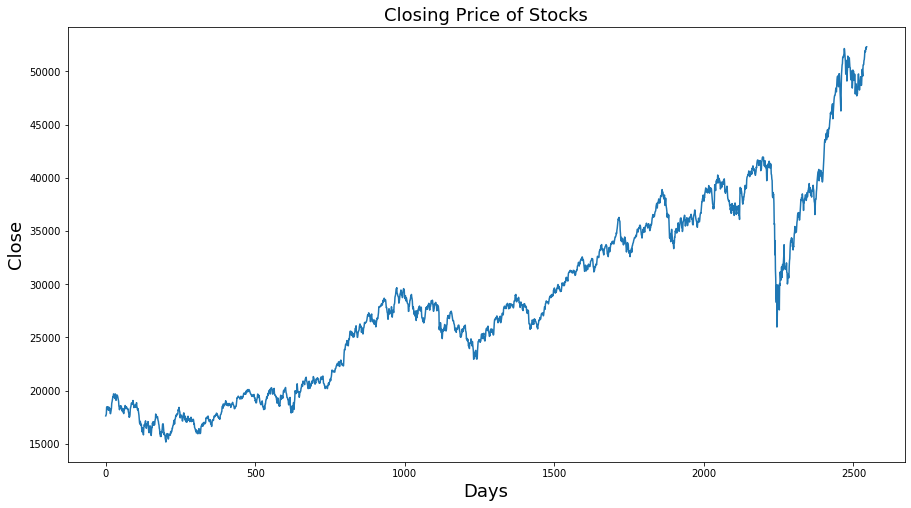

In [ ]:
# The data -Closing Price

plt.figure(figsize=(15,8))
plt.title('Closing Price of Stocks', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(stocks['Close'])
plt.show()

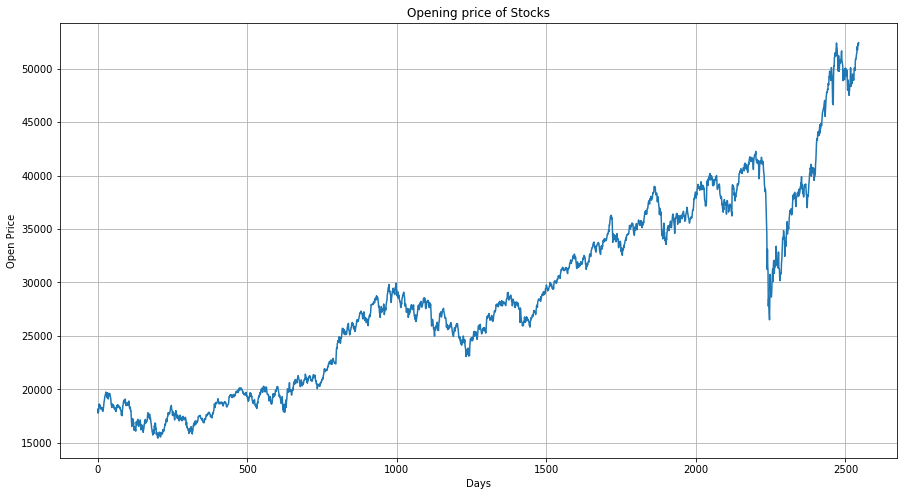

In [ ]:
# The data -Open Price
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(stocks['Open'])
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.title('Opening price of Stocks')
plt.show()

Text(0.5, 1.0, 'Stock Returns')

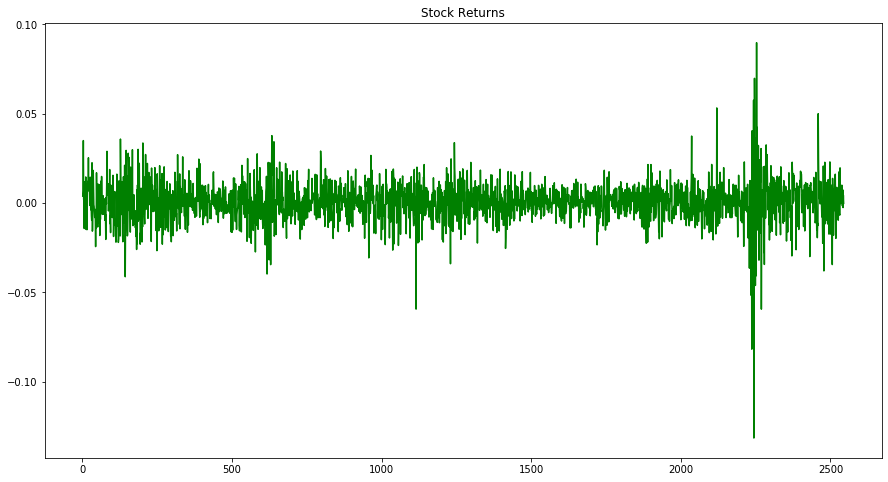

In [ ]:
# Stocks returns
close = stocks['Close']
returns = close / close.shift(1) - 1

plt.figure(figsize = (15,8))
returns.plot(label='Return', color = 'g')
plt.title("Stock Returns")

# Time series Analysis -For Close Price

In [ ]:
#splitting the data
train = stocks[:1600]
test = stocks[1600:]

In [ ]:
train.shape


(1600, 6)

In [ ]:
test.shape

(945, 6)

In [ ]:
# Now performing Dickey-Fuller test
def adfullerTest(X):
    result = adfuller(X,autolag = 'AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No of Lags Used: %f' % result[2])
    print('Number of Obs Used: %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <=0.05 :
         print("Reject against the null hypothesis, time series is stationary")
    else:
        print("Accept null hypothesis, time series is non-stationary ")

In [ ]:
adfullerTest(train['Close'])

ADF Statistic: -0.372978
p-value: 0.914514
No of Lags Used: 2.000000
Number of Obs Used: 1597.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


Text(0.5, 1.0, 'Mean and Standard Deviation on  transformed data')

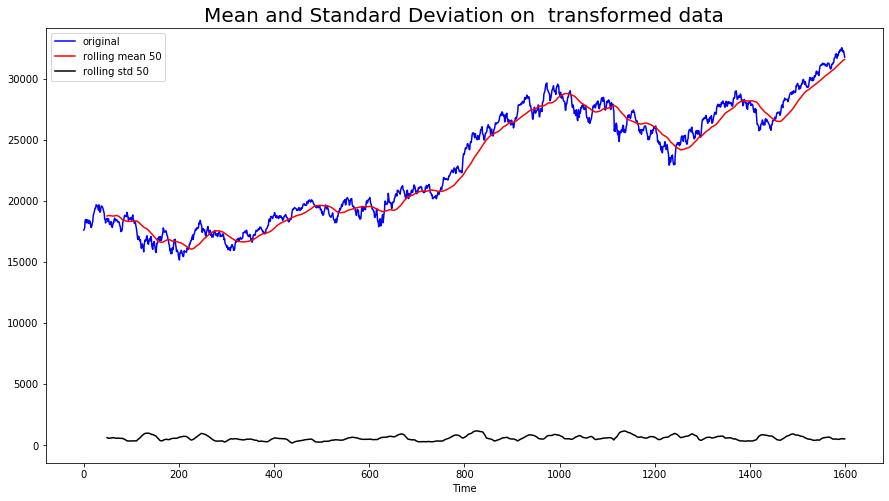

In [ ]:
# Rolling Statistics
rolling_mean_50 = (train['Close']).rolling(window=50).mean()
rolling_std_50 = (train['Close']).rolling(window=50).std()
plt.figure(figsize = (15,8))
plt.plot((train['Close']), color = 'blue', label = 'original')
plt.plot(rolling_mean_50, color = 'red', label = 'rolling mean 50')
plt.plot(rolling_std_50, color = 'black', label = 'rolling std 50')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on  transformed data',  fontsize = 20)

In [ ]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

In [ ]:
train_log.shape

(1600,)

In [ ]:
test_log.shape

(945,)

In [ ]:
from numpy import log
adfullerTest(log(train['Close']))

ADF Statistic: -0.690597
p-value: 0.849170
No of Lags Used: 1.000000
Number of Obs Used: 1598.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


Running this shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

Text(0.5, 1.0, 'Mean and Standard Deviation on Log transformed data')

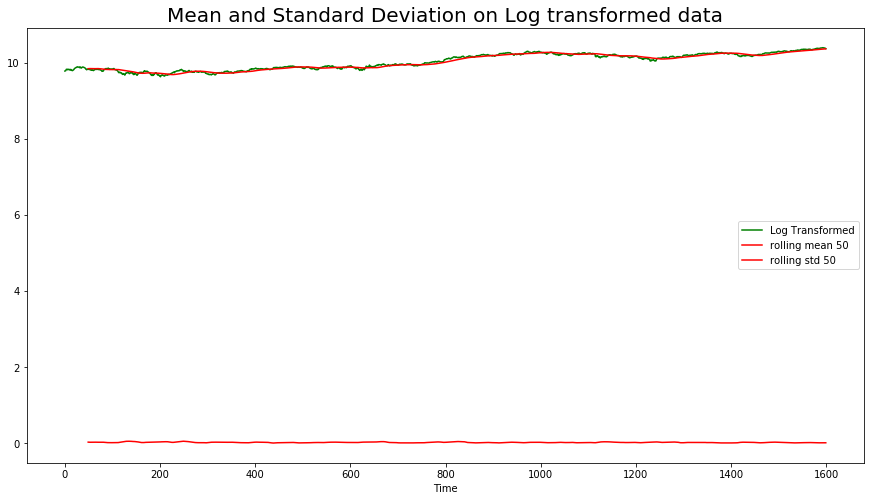

In [ ]:
rolling_mean_50 = log(train['Close']).rolling(window=50).mean()
rolling_std_50 = log(train['Close']).rolling(window=50).std()
plt.figure(figsize = (15,8))
plt.plot(log(train['Close']), color = 'g', label = 'Log Transformed')
plt.plot(rolling_mean_50, color = 'r', label = 'rolling mean 50')
plt.plot(rolling_std_50, color = 'r', label = 'rolling std 50')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on Log transformed data',  fontsize = 20)

To Removing Linear Trend

We will now perform the first difference transformation to our series to remove the linear trend.

In [ ]:
mean_log = log(train['Close']).rolling(50).mean()

In [ ]:
train_log_diff = log(train['Close']) - mean_log
train_log_diff.dropna(inplace = True)
adfullerTest(train_log_diff)

ADF Statistic: -5.840660
p-value: 0.000000
No of Lags Used: 1.000000
Number of Obs Used: 1549.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Reject against the null hypothesis, time series is stationary


Text(0.5, 1.0, 'Mean and Standard Deviation on Differential Log Transformed data')

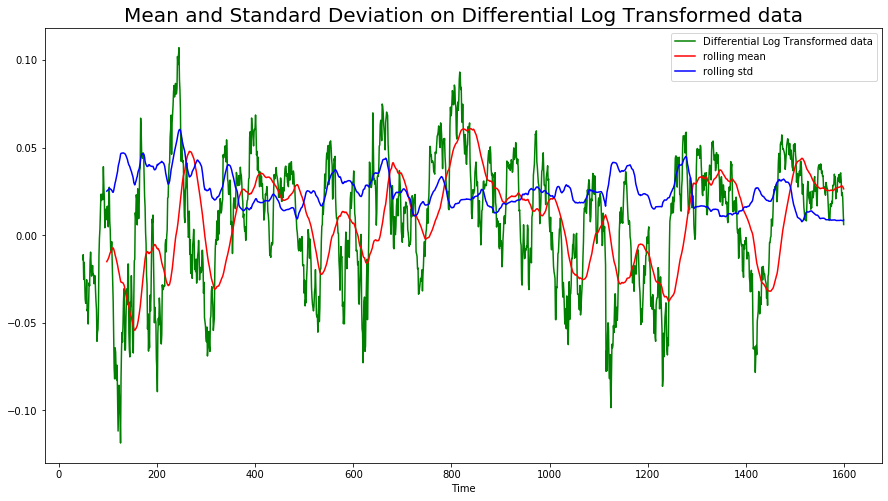

In [ ]:
data=   train_log_diff
mean = data.rolling(50).mean()
std = data.rolling(50).std()
plt.figure(figsize = (15,8))
plt.plot(data, color = 'g', label = 'Differential Log Transformed data')
plt.plot(mean, color = 'r', label = 'rolling mean')
plt.plot(std, color = 'b', label = 'rolling std')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on Differential Log Transformed data',  fontsize = 20)

In [ ]:
# ARIMA Model
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                             # start_p=1, 
                              #start_q=1,
                              #test="adf",
                              trace=True,
                              error_action = 'ignore',
                              suppress_warnings = True)
    return autoarima_model

In [ ]:
stocks_arima = arimamodel((train_log))
stocks_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-10242.069, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10239.123, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10246.090, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10246.483, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10238.876, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10244.867, Time=0.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10244.983, Time=0.95 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10244.041, Time=1.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-10246.526, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-10244.877, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-10244.960, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-10246.160, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-10243.659, Time=0.27 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.153 seco

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1600
Model:               SARIMAX(0, 1, 1)   Log Likelihood                5125.263
Date:                Sun, 13 Jun 2021   AIC                         -10246.526
Time:                        10:59:32   BIC                         -10235.772
Sample:                             0   HQIC                        -10242.532
                               - 1600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0760      0.023      3.233      0.001       0.030       0.122
sigma2      9.626e-05   2.43e-06     39.609      0.000    9.15e-05       0.000
===================================================================================
Ljung-Box (Q):                       39.16   Jarque-Bera (JB):               258.80
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

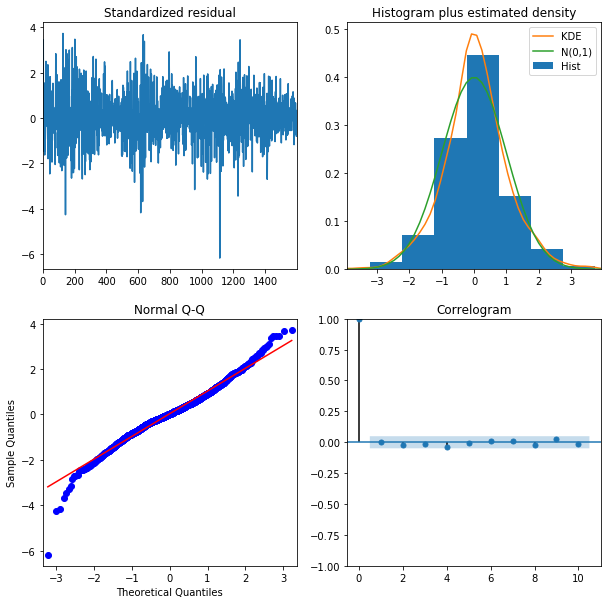

In [ ]:
stocks_arima.plot_diagnostics(figsize=(10,10))
plt.show()

In [ ]:
# Predictions on test data 

predict_ClosePrice = stocks_arima.predict(n_periods = len(test_log))
predict_ClosePrice = pd.DataFrame(predict_ClosePrice,index = test_log.index,columns=['predict_ClosePrice'])

Text(0, 0.5, 'Actual Stock Price')

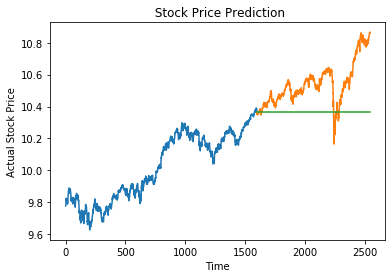

In [ ]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predict_ClosePrice, label='Prediction')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [ ]:
# Validation of the Arima Model

print('Mean Squared Error      ',mean_squared_error(test_log, predict_ClosePrice))
print('Root Mean_Squared_Error ',np.sqrt(mean_squared_error(test_log, predict_ClosePrice)))
print('Mean Absolute Error     ',mean_absolute_error(test_log, predict_ClosePrice))
print('R-Squared               ',r2_score(test_log, predict_ClosePrice))

Mean Squared Error       0.04783107262066329
Root Mean_Squared_Error  0.21870316097547216
Mean Absolute Error      0.17902064875790172
R-Squared                -1.7387521921094873


# Analyzing News Dataset

In [ ]:
news = pd.read_csv('india-news-headlines.csv')

In [ ]:
news.head()

publish_date headline_category  \
0      20010102           unknown   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1                Fissures in Hurriyat over Pak visit  
2              America's unwanted heading for India?  
3                 For bigwigs; it is destination Goa  
4               Extra buses to clear tourist traffic

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [ ]:

news['publish_date'] = pd.to_datetime(news['publish_date'],format= '%Y%m%d')
news.head()

publish_date headline_category  \
0   2001-01-02           unknown   
1   2001-01-02           unknown   
2   2001-01-02           unknown   
3   2001-01-02           unknown   
4   2001-01-02           unknown   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1                Fissures in Hurriyat over Pak visit  
2              America's unwanted heading for India?  
3                 For bigwigs; it is destination Goa  
4               Extra buses to clear tourist traffic

In [ ]:
news.shape

(3424067, 3)

In [ ]:

news.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [ ]:
#Analaysing 'HEADLINE_CATEGORY' with 'CITIES'

news['headline_category'].value_counts()

india                                                288541
unknown                                              209582
city.mumbai                                          134428
city.delhi                                           127717
business.india-business                              116761
                                                      ...  
elections.lok-sabha-elections-2019.tripura.news           8
lifespan-news                                             8
nepal-india-earthquake.opinion                            8
2013-the-year-sachin-bids-adieu.football-2013             8
sports.football.indian-super-league.team-profiles         8
Name: headline_category, Length: 1013, dtype: int64

In [ ]:
cities = news[news['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
cities.head(10)

publish_date headline_category  \
273    2001-01-04    city.bengaluru   
274    2001-01-04        city.patna   
277    2001-01-04    city.bengaluru   
278    2001-01-04        city.delhi   
642    2001-01-10        city.patna   
643    2001-01-10        city.patna   
644    2001-01-10        city.patna   
645    2001-01-10        city.patna   
2215   2001-03-09        city.delhi   
3603   2001-04-23    city.ahmedabad   

                                          headline_text  
273                 Three in race for chief secy's post  
274      Druggists' stir leads to shortage of medicines  
277                             He's not so inscrutable  
278                              DPCC stages Nyay rally  
642            Fend for yourselves; Pande tells doctors  
643   Bureaucracy undermining legislature's 'existence'  
644               State police collapses under pressure  
645             Court declares Pappu Yadav an absconder  
2215  Maneka asks govt to take back land for cow she...  
3603  Killer was promised Rs 25;000 for killing Nair...

In [ ]:
city = pd.DataFrame(columns = ['city_name'])
city['city_name'] = cities.headline_category.str.split('.',expand = True)[1]
cities = pd.concat([cities, city], axis = 1)
cities.head()

publish_date headline_category  \
273   2001-01-04    city.bengaluru   
274   2001-01-04        city.patna   
277   2001-01-04    city.bengaluru   
278   2001-01-04        city.delhi   
642   2001-01-10        city.patna   

                                      headline_text  city_name  
273             Three in race for chief secy's post  bengaluru  
274  Druggists' stir leads to shortage of medicines      patna  
277                         He's not so inscrutable  bengaluru  
278                          DPCC stages Nyay rally      delhi  
642        Fend for yourselves; Pande tells doctors      patna

In [ ]:
cities.drop('headline_category', inplace =True,axis =1)
cities.head()

publish_date                                   headline_text  city_name
273   2001-01-04             Three in race for chief secy's post  bengaluru
274   2001-01-04  Druggists' stir leads to shortage of medicines      patna
277   2001-01-04                         He's not so inscrutable  bengaluru
278   2001-01-04                          DPCC stages Nyay rally      delhi
642   2001-01-10        Fend for yourselves; Pande tells doctors      patna

In [ ]:
cites = cities.groupby(cities['city_name']).agg({'headline_text':'count'})
cites.head()

headline_text
city_name               
agartala            1183
agra                4884
ahmedabad          89513
ajmer               1587
allahabad          19285

In [ ]:
cites.rename(columns = {'headline_text':'headline_count'}, inplace = True)
cites = cites.sort_values(by='headline_count',ascending=False)
cites.head()

headline_count
city_name                 
mumbai              134428
delhi               127717
chandigarh          110453
hyderabad           104692
bengaluru            93663

In [ ]:
top10cites = cites.head(10)

In [ ]:
def fig_plot(top10cites,title1):
    fig = px.line(top10cites,title =title1)
    for i in top10cites.columns[0:]:
        fig.add_bar(x= top10cites.index ,y = top10cites['headline_count'],name = i)
    fig.show()

In [ ]:
fig_plot(top10cites,'Count of Headlines for top10 Cities')

In [ ]:
cities.head()

publish_date                                   headline_text  city_name
273   2001-01-04             Three in race for chief secy's post  bengaluru
274   2001-01-04  Druggists' stir leads to shortage of medicines      patna
277   2001-01-04                         He's not so inscrutable  bengaluru
278   2001-01-04                          DPCC stages Nyay rally      delhi
642   2001-01-10        Fend for yourselves; Pande tells doctors      patna

In [ ]:
#Analaysing 'HEADLINE_CATEGORY' with 'CATEGORIES'
news.head()

publish_date headline_category  \
0   2001-01-02           unknown   
1   2001-01-02           unknown   
2   2001-01-02           unknown   
3   2001-01-02           unknown   
4   2001-01-02           unknown   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1                Fissures in Hurriyat over Pak visit  
2              America's unwanted heading for India?  
3                 For bigwigs; it is destination Goa  
4               Extra buses to clear tourist traffic

In [ ]:
news['category']=news['headline_category'].str.split('.').map(lambda x : x[0])

In [ ]:

categories = news.groupby(['category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)
news_cat=categories.head(10)
news_cat.reset_index(inplace = True)
news_cat

category  headline_text
0           city        1922823
1          india         288541
2  entertainment         228300
3        unknown         209582
4       business         155508
5         sports         130211
6           home          99418
7          world          63397
8     life-style          43900
9             tv          38351

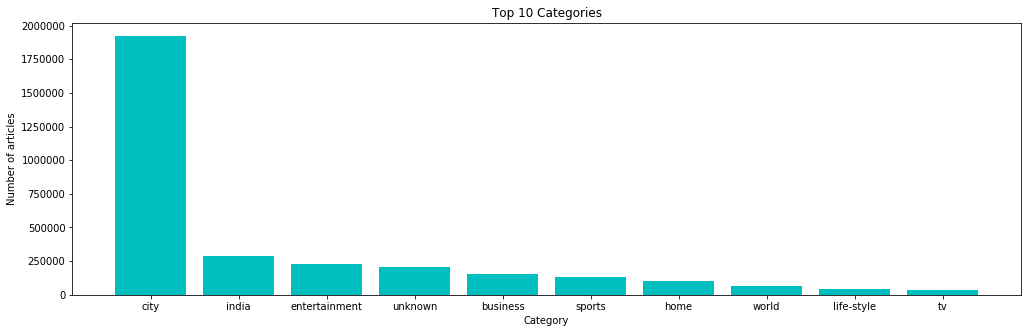

In [ ]:
import matplotlib.colors as mcolors
plt.figure(figsize=(17,5))
plt.bar(news_cat.category,height= news_cat.headline_text, color = 'c')
plt.xlabel('Category')
plt.ylabel('Number of articles')
plt.title('Top 10 Categories')
plt.show()

In [ ]:
news.drop('headline_category', inplace  = True, axis =1)
news.head()

publish_date                                      headline_text category
0   2001-01-02  Status quo will not be disturbed at Ayodhya; s...  unknown
1   2001-01-02                Fissures in Hurriyat over Pak visit  unknown
2   2001-01-02              America's unwanted heading for India?  unknown
3   2001-01-02                 For bigwigs; it is destination Goa  unknown
4   2001-01-02               Extra buses to clear tourist traffic  unknown

In [ ]:
# Cleaning the data -Removing Stop words

headline_text = ' '.join(news['headline_text'].str.lower())

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daveb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=1000).generate(headline_text)

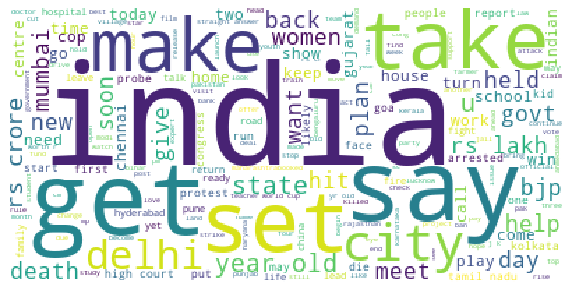

In [ ]:
rcParams['figure.figsize'] = 10, 10
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Sentimental Analaysis -- Assigning Polarity to the Headlines

# Create a function to get the subjectivity
def Subjectivity(text):
       return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def Polarity(text):
      return  TextBlob(text).sentiment.polarity

In [ ]:
news['Subjectivity'] =news['headline_text'].apply(Subjectivity)
news['Polarity'] =news['headline_text'].apply(Polarity)

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\daveb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import nltk

senti = SentimentIntensityAnalyzer()

In [ ]:
news['Compound'] = [senti.polarity_scores(s)['compound'] for s in news['headline_text']]
news['Negative'] = [senti.polarity_scores(s)['neg'] for s in news['headline_text']]
news['Neutral'] = [senti.polarity_scores(s)['neu'] for s in news['headline_text']]
news['Positive'] = [senti.polarity_scores(s)['pos'] for s in news['headline_text']]

In [ ]:
news.head()

publish_date                                      headline_text category  \
0   2001-01-02  Status quo will not be disturbed at Ayodhya; s...  unknown   
1   2001-01-02                Fissures in Hurriyat over Pak visit  unknown   
2   2001-01-02              America's unwanted heading for India?  unknown   
3   2001-01-02                 For bigwigs; it is destination Goa  unknown   
4   2001-01-02               Extra buses to clear tourist traffic  unknown   

   Subjectivity  Polarity  Compound  Negative  Neutral  Positive  
0      0.000000      0.00    0.2924     0.000    0.805     0.195  
1      0.000000      0.00    0.0000     0.000    1.000     0.000  
2      0.000000      0.00   -0.2263     0.322    0.678     0.000  
3      0.000000      0.00    0.0000     0.000    1.000     0.000  
4      0.241667      0.05    0.3818     0.000    0.658     0.342

# Hybrid Model - Combining News & Stock Data

In [ ]:
news.rename(columns = {'publish_date':'Date'}, inplace = True)

In [ ]:
df_merge = pd.merge(stocks, news, how='inner', on=['Date'])
df_merge.head()

Date     Close      Open      High      Low   Vol.  \
0 2011-02-24  17632.41  18135.12  18135.12  17559.7  23040   
1 2011-02-24  17632.41  18135.12  18135.12  17559.7  23040   
2 2011-02-24  17632.41  18135.12  18135.12  17559.7  23040   
3 2011-02-24  17632.41  18135.12  18135.12  17559.7  23040   
4 2011-02-24  17632.41  18135.12  18135.12  17559.7  23040   

                                    headline_text       category  \
0     Is she looking for her absentee dad in you?     life-style   
1  Special 'Dum Maro Dum' screening for Dev Anand  entertainment   
2         Party time for South African cricketers  entertainment   
3        Aamir Khan at Himani Verma's book launch  entertainment   
4                     TV's bizarre fashion trends             tv   

   Subjectivity  Polarity  Compound  Negative  Neutral  Positive  
0      0.000000  0.000000   -0.2732     0.208    0.792     0.000  
1      0.571429  0.357143    0.4019     0.000    0.722     0.278  
2      0.000000  0.000000    0.4019     0.000    0.649     0.351  
3      0.000000  0.000000    0.0000     0.000    1.000     0.000  
4      0.600000  0.400000   -0.3182     0.434    0.566     0.000

In [ ]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df.head()

Close  Subjectivity  Polarity  Compound  Negative  Neutral  Positive
0  17632.41      0.000000  0.000000   -0.2732     0.208    0.792     0.000
1  17632.41      0.571429  0.357143    0.4019     0.000    0.722     0.278
2  17632.41      0.000000  0.000000    0.4019     0.000    0.649     0.351
3  17632.41      0.000000  0.000000    0.0000     0.000    1.000     0.000
4  17632.41      0.600000  0.400000   -0.3182     0.434    0.566     0.000

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

Close  Subjectivity  Polarity  Compound  Negative  Neutral  Positive
0  0.075433      0.000000  0.500000  0.359014     0.208    0.792     0.000
1  0.075433      0.571429  0.678571  0.707147     0.000    0.722     0.278
2  0.075433      0.000000  0.500000  0.707147     0.000    0.649     0.351
3  0.075433      0.000000  0.500000  0.499897     0.000    1.000     0.000
4  0.075433      0.600000  0.700000  0.335809     0.434    0.566     0.000

In [ ]:
# Spliting Data into Train and test

X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
def func_graph(results,names):
    fig = plt.figure()
    fig.suptitle('MSE value of all Algorithms Comparison')
    ax = fig.add_subplot(111)
    width = 0.5        
    bars=plt.bar(names,results, width, align='center')
    ax.set_xticklabels(names)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval +0.005, yval)
    plt.show()

In [ ]:
from sklearn import metrics

def metric_calc(name,model,category, X_train, Y_train, X_test, Y_test):
    if category =='TRAINING DATA' :
        X_data= X_train
        Y_data=Y_train
    else :
        X_data= X_test
        Y_data=Y_test
        
    model.fit(X_train, Y_train)
    predictions = model.predict(X_data)
    mse =round(metrics.mean_squared_error(predictions,Y_data),4)   
    print('For ', name, 'MSE-Value is ', mse)
    return mse

In [ ]:
def func_modelling(i) :
    count=0
    count=count+1
    X = X_train[i]
    Y = Y_train
    x_test = X_test[i]
    seed = 7
    # preparing models list
    models = []
    models.append(('Decision Tree',' DecisiontreeRegressor  ', DecisionTreeRegressor()))
    models.append(('Random Forest',' RandomForestRegressor  ', RandomForestRegressor()))
    models.append(('XG Boost',' XGBRegressor  ', xgboost.XGBRegressor()))
    models.append(('LG Boost',' LGBMRegressor ', lightgbm.LGBMRegressor()))
    models.append(('ADA Boost',' AdaBoostRegressor ', AdaBoostRegressor()))
    results_train = []
    results_test = []
    names = []
    scoring = 'MSE'

    print('Metrics calcuated while TRANING the model')
    for name,label, model in models:
            cv_results_train=metric_calc(name,model,'TRAINING DATA',X,Y, x_test,Y_test)
            results_train.append(cv_results_train)
            names.append(name)
    func_graph(results_train,names)
    
    print('Evaluating the model on TESTING DATA')
    for name,label, model in models:
            cv_results_test=metric_calc(name,model,'TESTING DATA',X,Y, x_test,Y_test)
            results_test.append(cv_results_test)
            #names.append(name)
    func_graph(results_test,names)

Metrics calcuated while TRANING the model
For  Decision Tree MSE-Value is  0.0435
For  Random Forest MSE-Value is  0.0443
For  XG Boost MSE-Value is  0.0503
For  LG Boost MSE-Value is  0.0507
For  ADA Boost MSE-Value is  0.053


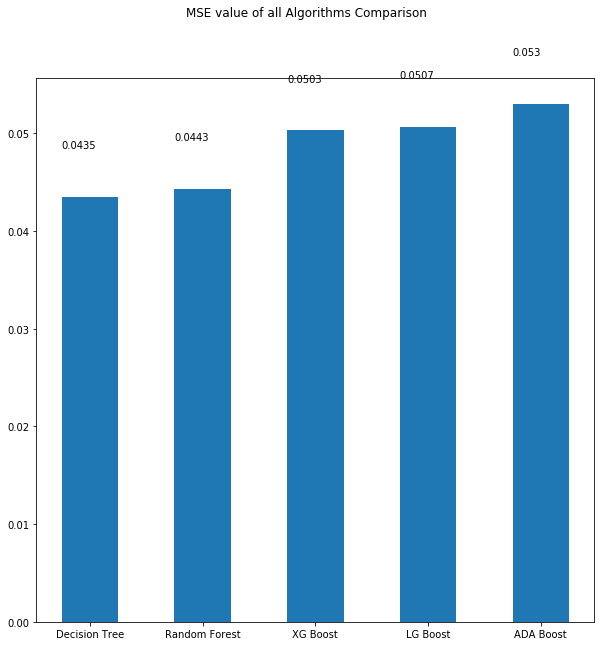

Evaluating the model on TESTING DATA
For  Decision Tree MSE-Value is  0.0564
For  Random Forest MSE-Value is  0.052
For  XG Boost MSE-Value is  0.0507
For  LG Boost MSE-Value is  0.0508
For  ADA Boost MSE-Value is  0.0527


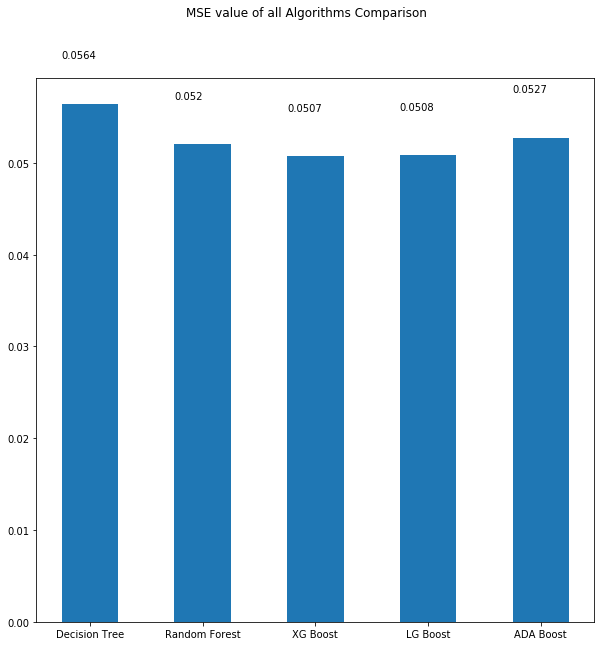

In [ ]:
# Training Model
func_modelling(X_train.columns)

# LGBMRegressor has the least MSE and it has performed best for sentimental Anaylsis to predict if the stock close price with either increase or decrease depending on the news on that day.